In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn import svm

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Load Data

First step is to ingest all the data we have available and merge them into a flattened datastructure containing all measurements. Indexes are ignored and rewritten to allow all readings to be added to the DF:

In [8]:
# parse the labels.csv
labels = pd.read_csv('labels.csv', index_col=0)

# grab filenames from the data directory
filenames = os.listdir('data')

dataframes = []

# parse and concatenate all csv files into df
for filename in filenames:
  if filename.endswith('.csv'):
    batch = pd.read_csv(os.path.join('data',filename), index_col=0)
    batch['batch'] = int(filename.replace('.csv', ''))
    dataframes.append(batch)

df = pd.concat(dataframes, ignore_index=True)

# print(df[:10])


In [9]:
# add label column (if it is not already available)
if (not 'label' in df.columns):
  df = df.merge(labels, left_on=["batch"], right_on=["id"])

# drop batch column (if it is not already available)
if ('batch' in df.columns):
  df.drop('batch', axis=1, inplace=True)

def time_to_float(inputstr):
  hours, minutes, seconds = map(float, inputstr.split(':'))

  # return hours * 3600 + minutes * 60 + seconds
  # this is sufficient because hours should always be 0
  return minutes * 60 + seconds

if (not df['zeit'].dtype == 'category'):
  df['label'] = df['label'].astype('category')
if (not df['zeit'].dtype == 'float64'):
  df['zeit'] = df['zeit'].apply(time_to_float)

# print(df[:10])


# Data Visualisation

In [10]:
sensors = df['sensorid'].unique()

if not os.path.exists('plots'):
  os.makedirs('plots')

# for sensor in sensors:
#   fig = px.scatter(df[df['sensorid'] == sensor], x='zeit', y='messwert', color='label')
#   # fig.show(observed=False, interactive=False)
#   fig.write_image(os.path.join('plots', f'{sensor}.png'))


# Model Creation

## Test Data Preprocessing

In [11]:
X = df[['zeit','messwert','sensorid']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)



## Single Random Forest

### Modelling

In [12]:
rf_clf = RandomForestClassifier(max_depth=16, n_jobs=8, max_features=3, random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=16, max_features=3, n_jobs=8, random_state=42)

### Evaluation

0.4419261741513699


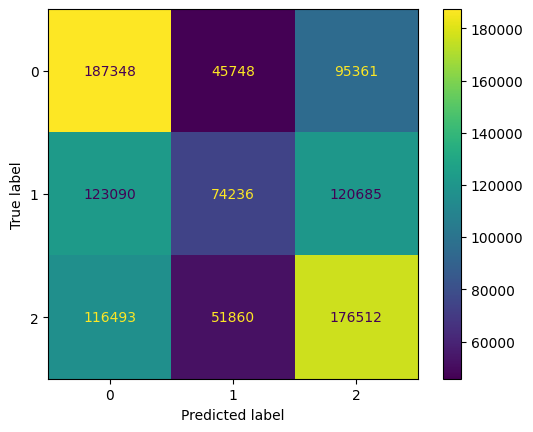

In [13]:
rf_y_pred = rf_clf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_y_pred)
print(rf_acc)

rf_cm = confusion_matrix(y_test, rf_y_pred, labels=rf_clf.classes_)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_clf.classes_)
rf_disp.plot()
plt.show()


## Random Forst per Sensor

## Support Vector Machines

### Modelling

In [ ]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train, random_state=42)


### Evaluation

In [ ]:
svm_y_pred = svm_clf.predict(X_test)

svm_acc = accuracy_score(y_test, svm_y_pred)
print(svm_acc)

svm_cm = confusion_matrix(y_test, svm_y_pred, labels=svm_clf.classes_)
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm_clf.classes_)
svm_disp.plot()
plt.show()


## Convoluted Neural Network

### Modelling

In [ ]:
cnn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,50), random_state=42)
cnn_clf.fit(X_train, y_test)


## Gradient Boosting